In [1]:
import tensorflow
tensorflow.__version__

2024-03-21 07:07:43.368578: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-21 07:07:44.477924: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2024-03-21 07:07:44.478007: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2024-03-21 07:07:44.478016: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like t

'2.11.0'

In [2]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
    # RIP Training time
    raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


2024-03-21 07:07:45.473070: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-21 07:07:46.888312: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:42] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
2024-03-21 07:07:46.888354: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /device:GPU:0 with 46699 MB memory:  -> device: 0, name: NVIDIA RTX A6000, pci bus id: 0000:86:00.0, compute capability: 8.6
2024-03-21 07:07:46.889637: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:42] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value 

In [3]:
TRAIN_JSON = './../Data/line_data.json'
RAW_FOLDER = './../Data/line_data/' 

In [4]:
import json
# open these label jsons files
with open(TRAIN_JSON, 'r', encoding='utf8') as f:
    train_labels = json.load(f)

In [1]:
#find all characters in labels (so we don't blindly add chacters not even existed in our dataset)
char_list_1= set()
for label in train_labels.values():
    char_list_1.update(set(label))
char_list=sorted(char_list_1)
"".join(char_list)

print(len(char_list_1))
print(char_list_1)

NameError: name 'train_labels' is not defined

In [6]:
# show all possible labels characters
"".join(char_list)

' !"%&()*,-./0123456789:;?ABCDEFGHIJKLMNOPQRSTUVWXYabcdefghijklmnopqrstuvxyzÀÁÂÔÚÝàáâãèéêìíòóôõùúýĂăĐđĩũƠơƯưạẢảẤấẦầẩẫậắằẳẵặẹẻẽếỀềỂểễỆệỉịọỏỐốỒồổỗộớờỞởỡợụỦủứừửữựỳỷỹ'

In [7]:
# --- list of all vietnamese characters labels (185)
chars = ' abcdđefghiklmnoơpqrstuưvxyăâàảãáạằẳẵặầẫấậêèẻẽéẹềểễếệìỉĩíịòỏõóọôồổỗốộờỡớợùủũúụừửữứựỳỷỹýỵABCDĐEFGHIKLMNOƠPQRSTUƯVXYĂÂÀẢÃÁẠẰẲẴẶẦẪẤẬÊÈẺẼÉẸỀỂỄẾỆÌỈĨÍỊÒỎÕÓỌÔỒỔỖỐỘỜỠỚỢÙỦŨÚỤỪỬỮỨỰỲỶỸÝỴ0123456789'
char_list_2 = set(chars)

char_list_2=sorted(char_list_2)
print(len(char_list_2))
print(char_list_2)

185
[' ', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'X', 'Y', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'x', 'y', 'À', 'Á', 'Â', 'Ã', 'È', 'É', 'Ê', 'Ì', 'Í', 'Ò', 'Ó', 'Ô', 'Õ', 'Ù', 'Ú', 'Ý', 'à', 'á', 'â', 'ã', 'è', 'é', 'ê', 'ì', 'í', 'ò', 'ó', 'ô', 'õ', 'ù', 'ú', 'ý', 'Ă', 'ă', 'Đ', 'đ', 'Ĩ', 'ĩ', 'Ũ', 'ũ', 'Ơ', 'ơ', 'Ư', 'ư', 'Ạ', 'ạ', 'Ả', 'ả', 'Ấ', 'ấ', 'Ầ', 'ầ', 'Ẫ', 'ẫ', 'Ậ', 'ậ', 'Ằ', 'ằ', 'Ẳ', 'ẳ', 'Ẵ', 'ẵ', 'Ặ', 'ặ', 'Ẹ', 'ẹ', 'Ẻ', 'ẻ', 'Ẽ', 'ẽ', 'Ế', 'ế', 'Ề', 'ề', 'Ể', 'ể', 'Ễ', 'ễ', 'Ệ', 'ệ', 'Ỉ', 'ỉ', 'Ị', 'ị', 'Ọ', 'ọ', 'Ỏ', 'ỏ', 'Ố', 'ố', 'Ồ', 'ồ', 'Ổ', 'ổ', 'Ỗ', 'ỗ', 'Ộ', 'ộ', 'Ớ', 'ớ', 'Ờ', 'ờ', 'Ỡ', 'ỡ', 'Ợ', 'ợ', 'Ụ', 'ụ', 'Ủ', 'ủ', 'Ứ', 'ứ', 'Ừ', 'ừ', 'Ử', 'ử', 'Ữ', 'ữ', 'Ự', 'ự', 'Ỳ', 'ỳ', 'Ỵ', 'ỵ', 'Ỷ', 'ỷ', 'Ỹ', 'ỹ']


In [8]:
set_1 = set(char_list_1)
set_2 = set(char_list_2)

combined_tokens = set_1.union(set_2)
combined_tokens = sorted(combined_tokens)

print(len(combined_tokens))
print(combined_tokens)

207
[' ', '!', '"', '%', '&', '(', ')', '*', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '?', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'x', 'y', 'z', 'À', 'Á', 'Â', 'Ã', 'È', 'É', 'Ê', 'Ì', 'Í', 'Ò', 'Ó', 'Ô', 'Õ', 'Ù', 'Ú', 'Ý', 'à', 'á', 'â', 'ã', 'è', 'é', 'ê', 'ì', 'í', 'ò', 'ó', 'ô', 'õ', 'ù', 'ú', 'ý', 'Ă', 'ă', 'Đ', 'đ', 'Ĩ', 'ĩ', 'Ũ', 'ũ', 'Ơ', 'ơ', 'Ư', 'ư', 'Ạ', 'ạ', 'Ả', 'ả', 'Ấ', 'ấ', 'Ầ', 'ầ', 'ẩ', 'Ẫ', 'ẫ', 'Ậ', 'ậ', 'ắ', 'Ằ', 'ằ', 'Ẳ', 'ẳ', 'Ẵ', 'ẵ', 'Ặ', 'ặ', 'Ẹ', 'ẹ', 'Ẻ', 'ẻ', 'Ẽ', 'ẽ', 'Ế', 'ế', 'Ề', 'ề', 'Ể', 'ể', 'Ễ', 'ễ', 'Ệ', 'ệ', 'Ỉ', 'ỉ', 'Ị', 'ị', 'Ọ', 'ọ', 'Ỏ', 'ỏ', 'Ố', 'ố', 'Ồ', 'ồ', 'Ổ', 'ổ', 'Ỗ', 'ỗ', 'Ộ', 'ộ', 'Ớ', 'ớ', 'Ờ', 'ờ', 'Ở', 'ở', 'Ỡ', 'ỡ', 'Ợ', 'ợ', 'Ụ', 'ụ', 'Ủ', 'ủ', 'Ứ', 'ứ', 'Ừ', 'ừ', 'Ử', 'ử', 'Ữ', 'ữ', 'Ự', 'ự', 

In [9]:
# convert the words to array of indexs based on the char_list
def encode_to_labels(txt):
    # encoding each output word into digits of indexes
    dig_lst = []
    for index, char in enumerate(txt):
        try:
            dig_lst.append(combined_tokens.index(char))
        except:
            print("No found in combined_tokens :", char)
        
    return dig_lst

In [10]:
encode_to_labels("Quốc Âm Tân Tự")

[41, 70, 166, 52, 0, 77, 62, 0, 44, 93, 63, 0, 44, 198]

In [11]:
import pathlib
# find all image paths for train folder 1 and 2 and test folder
train_image_path = []

for item in pathlib.Path(RAW_FOLDER).glob('**/*'):
    if item.is_file() and item.suffix not in [".json"]:
        train_image_path.append(str(item))

In [12]:
# train_image_path[:10]

In [13]:
#  Continue to preprocess dataset and create CRNN model with CTC loss!
import os

#Matching full absoluate paths and labels instead of filenames and labels 
dict_filepath_label={}
raw_data_path = pathlib.Path(os.path.join(RAW_FOLDER))
for item in raw_data_path.glob('**/*.*'):
    file_name=str(os.path.basename(item))
    if file_name != "labels.json":
      file_name = file_name.split(".")[0]
      label = train_labels[file_name]
      dict_filepath_label[str(item)]=label

In [14]:
# dict_filepath_label

In [15]:
# find the maximum label length
label_lens= []
for label in dict_filepath_label.values():
    label_lens.append(len(label))
max_label_len = max(label_lens)

print(max_label_len)

158


In [16]:
all_image_paths = list(dict_filepath_label.keys())

In [17]:
all_image_paths[0]

'../Data/line_data/20150220_0032_9415_1_tg_2_3.png'

In [18]:
# all_image_paths[:10]

In [19]:
import cv2
# find all widths and heights of images (this is useful if our dataset images got different sizes)
widths = []
heights = []
for image_path in all_image_paths:
    img = cv2.imread(image_path)
    (height, width, _) = img.shape
    heights.append(height)
    widths.append(width)

In [20]:
min_height = min(heights)
max_height = max(heights)
min_width = min(widths)
max_width = max(widths)

# this information is useful for making decision for padding and resizing
(min_height, max_height, min_width, max_width)

(40, 396, 321, 523)

In [21]:
from sklearn.model_selection import train_test_split
test_size = 0.2
train_image_paths, val_image_paths = train_test_split(all_image_paths, test_size=test_size, random_state=42)

In [22]:
# Constants (we choose this number as we later discover that the output of our CNN is (1,9,512) from out input)
TIME_STEPS = 182

In [23]:
# BUILD THE PIPELINE FOR THE IMAGES, definitely this is super basic pipeline and can be improved

import numpy as np

# lists for training dataset
training_img = []
training_txt = []
train_input_length = []
train_label_length = []
orig_txt = []
resize_max_width=0
# i=0
for train_img_path in train_image_paths:
    # print(f_name)
    # read input image and convert into gray scale image
    img = cv2.cvtColor(cv2.imread(train_img_path), cv2.COLOR_BGR2GRAY)

    height, width = img.shape

    img = cv2.resize(img,(int(118/height*width),118))
    
    height, width = img.shape
    
    if img.shape[1] > resize_max_width:
        resize_max_width = img.shape[1]
        # print(img.shape[0], img.shape[1])
    
    # if img.shape[1] > 3290:
    #     print(img.shape[1])
    #     print("Skipping padding for image:", train_img_path)
    #     continue

    img = np.pad(img, ((0,0),(0, 3290-width)), 'constant',constant_values=(255, 255))
    
    # Blur it
    img = cv2.GaussianBlur(img, (5,5), 0)

    # Threshold the image using adapative threshold
    img = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,  
                                # Use THRESH_BINARY
                                 blockSize=11, C=4)
    
    # Invert the image to get black characters on white background
    img = 255 - img  # Invert pixel values
    
    # Add channel dimension
    img = np.expand_dims(img , axis = 2)
    
    # Normalize each image
    img = img/255.

    label = dict_filepath_label[train_img_path]

    # Split data into validation and training dataset as 10% and 90% respectively
    orig_txt.append(label)   
    train_label_length.append(len(label))

    # Timesteps for valid input
    train_input_length.append(TIME_STEPS)
    training_img.append(img)

    # Convert words to digits based on charlist
    training_txt.append(encode_to_labels(label)) 
    # i+=1
    # if (i%500 == 0):
        # print ("Has processed trained {} files".format(i))
print(resize_max_width)

1542


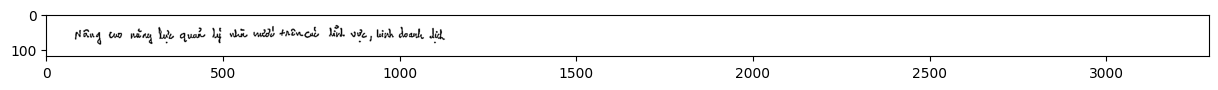

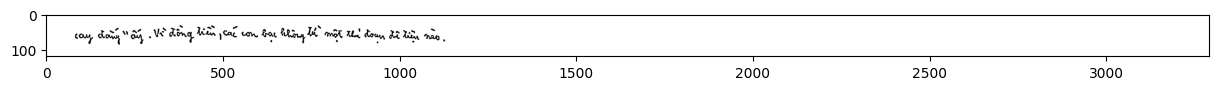

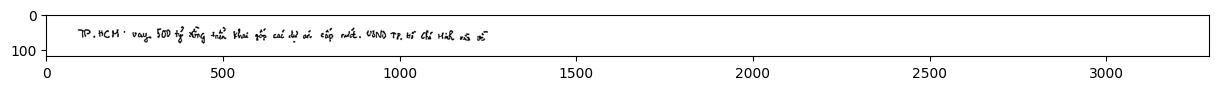

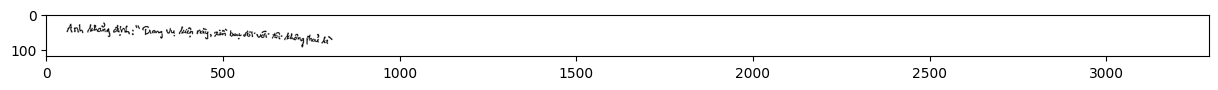

In [24]:
import matplotlib.pyplot as plt
for i in range(5):
    plt.figure(figsize=(15,2))
    plt.imshow(training_img[i][:,:,0], cmap='binary')
    plt.show()
    # print(training_img[i][:,:,0])

In [25]:
# # Open the text file in write mode
# with open("processed_image.txt", "w") as f:
#   # Loop through each row in the image matrix
#   for row in training_img[i][:,:,0]:
#     # Convert the row (list of integers) to a space-separated string
#     row_str = " ".join([str(pixel) for pixel in row])
#     # Write the string representation of the row to the file
#     f.write(row_str + "\n")

In [26]:
#lists for validation dataset
valid_img = []
valid_txt = []
valid_input_length = []
valid_label_length = []
valid_orig_txt = []

i=0

for val_img_path in val_image_paths:
    
    img = cv2.cvtColor(cv2.imread(val_img_path), cv2.COLOR_BGR2GRAY)
    
    img = cv2.resize(img,(int(118/height*width),118))
    
    if img.shape[1] > resize_max_width:
        resize_max_width = img.shape[1]
        
    img = np.pad(img, ((0,0),(0, 3290-width)), 'constant',constant_values=(255, 255))
    
    # Blur it
    img = cv2.GaussianBlur(img, (5,5), 0)

    # Threshold the image using adapative threshold
    img = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,  
                                # Use THRESH_BINARY
                                 blockSize=11, C=4)
    
    # Invert the image to get black characters on white background
    img = 255 - img  # Invert pixel values

    # Add channel dimension
    img = np.expand_dims(img , axis = 2)
    
    # Normalize each image
    img = img/255.

    label = dict_filepath_label[val_img_path]

    valid_orig_txt.append(label)   
    valid_label_length.append(len(label))

    # our time steps for valid input
    valid_input_length.append(TIME_STEPS)
    valid_img.append(img)

    # convert words to digits based on charlist
    valid_txt.append(encode_to_labels(label))
    i+=1
    if (i%500 == 0):
        print ("Has processed test {} files".format(i))
print(resize_max_width)

Has processed test 500 files
Has processed test 1000 files
1542


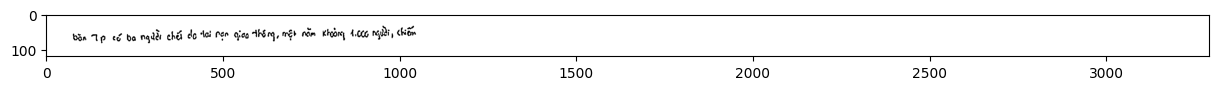

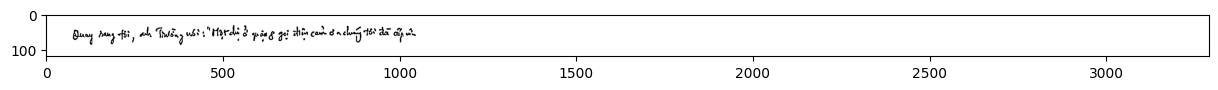

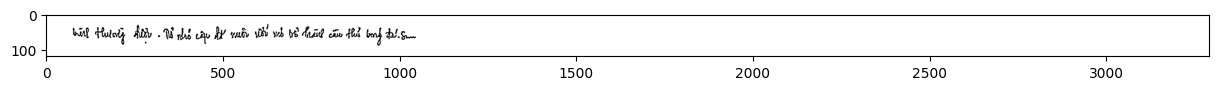

In [27]:
import matplotlib.pyplot as plt
for i in range(5):
    plt.figure(figsize=(15,2))
    plt.imshow(valid_img[i][:,:,0], cmap="binary")
    plt.show()

In [28]:
# this is the most controversial part when our max_label_len should be set different or slightly smaller than TIME_STEPS
# but let stick to the conventional/normal way: we should to be the same with our TIME_STEPS
max_label_len = TIME_STEPS 

In [29]:
# import padding library
from tensorflow.keras.preprocessing.sequence import pad_sequences

# pad each output label to maximum text length, remember we did that so that we keep training with rnn consistent?
train_padded_txt = pad_sequences(training_txt, maxlen=max_label_len, padding='post', value = 0).astype('int32')
valid_padded_txt = pad_sequences(valid_txt, maxlen=max_label_len, padding='post', value = 0).astype('int32')

In [30]:
len(train_padded_txt[0])

182

In [31]:
# import our model, different layers and activation function 
from tensorflow.keras.layers import Dense, LSTM, Reshape, BatchNormalization, Input, Conv2D, MaxPool2D, Lambda, Bidirectional, Add, Activation
from tensorflow.keras.models import Model
from tensorflow.keras.activations import relu, sigmoid, softmax
import tensorflow.keras.backend as K
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import CSVLogger, TensorBoard, ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import Reshape, Layer
from keras import initializers, regularizers, constraints

In [32]:
class Attention2(Layer):
    def __init__(self, return_sequences = False):
        self.return_sequences = return_sequences
        super(Attention2, self).__init__()

    def build(self, input_shape):
        self.Weights = self.add_weight(name='attn_weight', 
                                        shape = (input_shape[-1], 1),
                                        initializer = "normal"
                                        )
        self.bias = self.add_weight(name='attn_bias', 
                                        shape = (input_shape[1], 1),
                                        initializer = "zeros"
                                        )
        super(Attention2, self).build(input_shape)
    
    def call(self, x):
        exp = K.tanh(K.dot(x, self.Weights) + self.bias)

        axon = K.softmax(exp, axis=1)
        output = x * axon

        if self.return_sequences:
            return output
        
        return K.sum(output, axis=1)

In [33]:
class Attention(Layer):
    def __init__(self,
                 W_regularizer=None, b_regularizer=None,
                 W_constraint=None, b_constraint=None,
                 bias=True,
                 return_sequences = False,
                 **kwargs):
        self.init = initializers.get('random_normal')

        self.W_regularizer = regularizers.get(W_regularizer)
        self.b_regularizer = regularizers.get(b_regularizer)

        self.W_constraint = constraints.get(W_constraint)
        self.b_constraint = constraints.get(b_constraint)

        self.bias = bias
        self.return_sequences = return_sequences

        super(Attention, self).__init__(**kwargs)

    def build(self, input_shape):
        self.Weights = self.add_weight(name='attn_weight', 
                                        shape = (input_shape[-1], 1),
                                        initializer=self.init,
                                        regularizer=self.W_regularizer,
                                        constraint=self.W_constraint
                                        )
        self.bias = self.add_weight(name='attn_bias', 
                                        shape = (input_shape[1], 1),
                                        initializer='zero',
                                        regularizer=self.b_regularizer,
                                        constraint=self.b_constraint
                                        )
        super(Attention, self).build(input_shape)

    def call(self, x):
        exp = K.tanh(K.dot(x, self.Weights) + self.bias)
        axon = K.softmax(exp, axis=1)
        output = x * axon

        if self.return_sequences:
            return output
        
        return K.sum(output, axis=1)

In [34]:
from tensorflow.keras.applications import ResNet50

In [35]:
inputs = Input(shape=(118, 3290, 1), name='input')

# Block 1
x = Conv2D(64, (3,3), padding='same', name='conv1')(inputs)
x = MaxPool2D(pool_size=3, strides=3, name='pool1')(x)
x = Activation('relu', name='relu1')(x)
x_1 = x 

# Block 2
x = Conv2D(128, (3,3), padding='same', name='conv2')(x)
x = MaxPool2D(pool_size=3, strides=3, name='pool2')(x)
x = Activation('relu', name='relu2')(x)
x_2 = x

# Block 3
x = Conv2D(256, (3,3), padding='same', name='conv3')(x)
x = BatchNormalization(name='batch_norm3')(x)
x = Activation('relu', name='relu3')(x)
x_3 = x

# Block4
x = Conv2D(256, (3,3), padding='same', name='conv4')(x)
x = BatchNormalization(name='batch_norm4')(x)
x = Add(name='add4')([x,x_3])
x = Activation('relu', name='relu4')(x)
x_4 = x

# Block5
x = Conv2D(512, (3,3), padding='same', name='conv5')(x)
x = BatchNormalization(name='batch_norm5')(x)
x = Activation('relu', name='relu5')(x)
x_5 = x

# Block6
x = Conv2D(512, (3,3), padding='same', name='conv6')(x)
x = BatchNormalization(name='batch_norm6')(x)
x = Add(name='add6')([x,x_5])
x = Activation('relu', name='relu6')(x)
x_6 = x

# Block7
x = Conv2D(1024, (3,3), padding='same', name='conv7')(x)
x = BatchNormalization(name='batch_norm7')(x)
x = Activation('relu', name='relu7')(x)
x_7 = x
# print(x.shape,"block 7")
# Block8
x = Conv2D(1024, (3,3), padding='same', name='conv8')(x)
x = BatchNormalization(name='batch_norm8')(x)
x = MaxPool2D(pool_size=(3, 2), name='pool3')(x)
x = Activation('relu', name='relu8')(x)
# print(x.shape)
x = MaxPool2D(pool_size=(3, 1))(x)
# print(x.shape)
squeezed = Lambda(lambda x: K.squeeze(x, 1))(x)
attn_layer_1 = Attention(return_sequences=True)(squeezed)
blstm_1 = Bidirectional(LSTM(512, return_sequences=True, dropout = 0.2), name = 'bi-lstm_1')(attn_layer_1)
blstm_2 = Bidirectional(LSTM(512, return_sequences=True, dropout = 0.2), name = 'bi-lstm_2')(blstm_1)


lstm_1 = LSTM(512, return_sequences=True, dropout = 0.2, name = 'lstm_1')(blstm_2)
# attn_layer_2 = Attention(return_sequences=True)(lstm_1)

outputs = Dense(len(combined_tokens)+1, activation = 'softmax')(lstm_1)


2024-03-21 07:08:47.185200: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 46699 MB memory:  -> device: 0, name: NVIDIA RTX A6000, pci bus id: 0000:86:00.0, compute capability: 8.6
2024-03-21 07:08:47.185547: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 46699 MB memory:  -> device: 1, name: NVIDIA RTX A6000, pci bus id: 0000:af:00.0, compute capability: 8.6


In [36]:
### ctc definition part 
"""
The reason why we use ctc_batch_cost instead of ctc_cost because
In batch cost, the program managed to mask out padded sequence using label_length, 
So the cost won't include the padding 0 section.
"""

"""
The way CTC is modelled currently in Keras is that you need to implement the loss function as a layer, you did that already (loss_out). 
Your problem is that the inputs you give that layer are not tensors from Theano/TensorFlow but numpy arrays.
To change that one option is to model these values as inputs to your model.
That is why we need to manually create Input for labels, input length and label_length.
"""

# define the label input shape for ctc
labels = Input(name='the_labels', shape=[max_label_len], dtype='float32') #shape = 208

"""
where input_length and label_length are constants you created previously
the easiest way here is to have a fixed batch size in training 
the lengths should have the same batch size (see shapes in the link for ctc_cost)   
"""

# define the length of input and label for ctc
input_length = Input(name='input_length', shape=[1], dtype='int64')
label_length = Input(name='label_length', shape=[1], dtype='int64')
 
# define a ctc lambda function to take arguments and return ctc_bach_cost
def ctc_lambda_func(args):
    y_pred, labels, input_length, label_length = args
    return K.ctc_batch_cost(labels, y_pred, input_length, label_length)
 
# out loss function (just take the inputs and put it in our ctc_batch_cost)
loss_out = Lambda(ctc_lambda_func, output_shape=(1,), name='ctc')([outputs, labels, input_length, label_length])

#model to be used at training time
model = Model(inputs=[inputs, labels, input_length, label_length], outputs=loss_out)

In [37]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input (InputLayer)             [(None, 118, 3290,   0           []                               
                                1)]                                                               
                                                                                                  
 conv1 (Conv2D)                 (None, 118, 3290, 6  640         ['input[0][0]']                  
                                4)                                                                
                                                                                                  
 pool1 (MaxPooling2D)           (None, 39, 1096, 64  0           ['conv1[0][0]']                  
                                )                                                             

In [38]:
# ready ctc loss function and optimizers
model.compile(loss={'ctc': lambda y_true, y_pred: y_pred}, optimizer = 'adam')

# our callbacks hell to optimize our learning
callbacks = [
    TensorBoard(
        log_dir='./logs',
        histogram_freq=10,
        profile_batch=0,
        write_graph=True,
        write_images=False,
        update_freq="epoch"),
    ModelCheckpoint(
        filepath="test.h5",
        monitor='val_loss',
        save_best_only=True,
        save_weights_only=True,
        verbose=1),
    EarlyStopping(
        monitor='val_loss',
        min_delta=1e-8,
        patience=20,
        restore_best_weights=True,
        verbose=1),
    ReduceLROnPlateau(
        monitor='val_loss',
        min_delta=1e-8,
        factor=0.2,
        patience=10,
        verbose=1)
]
callbacks_list = callbacks

In [39]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input (InputLayer)             [(None, 118, 3290,   0           []                               
                                1)]                                                               
                                                                                                  
 conv1 (Conv2D)                 (None, 118, 3290, 6  640         ['input[0][0]']                  
                                4)                                                                
                                                                                                  
 pool1 (MaxPooling2D)           (None, 39, 1096, 64  0           ['conv1[0][0]']                  
                                )                                                             

In [40]:
# notice I convert everything to numpy array here since model can fit either tensors and numpy array
# the reason why i stick with numpy array because it is simple to code and also because it is baseline solution
# I want to use openCV (can't run with tensors because it is CPU operations)
# And if I want to use tensors then i will make sure my image preprocessing functions uses tensor compatible operations

# ready our training data
training_img = np.array(training_img)
train_input_length = np.array(train_input_length)  # all must be equal length to T timesteps
train_label_length = np.array(train_label_length)  # different length (only the same in Captcha dataset)

# ready our validating data
valid_img = np.array(valid_img)
valid_input_length = np.array(valid_input_length) # all must be equal length to T timesteps
valid_label_length = np.array(valid_label_length) # different length (only the same in Captcha dataset)



In [41]:
# choose batchsize and epochs

batch_size = 16
epochs = 2

history = model.fit(x=[training_img, train_padded_txt, train_input_length, train_label_length], 
          y=np.zeros(len(training_img)),
          batch_size=batch_size, 
          epochs = epochs,
          validation_data = ([valid_img, valid_padded_txt, valid_input_length, valid_label_length], [np.zeros(len(valid_img))]),
          verbose = 1, 
          callbacks = callbacks_list,
          shuffle=True)

Epoch 1/2
Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


2024-03-21 07:09:35.904409: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8302
2024-03-21 07:09:37.529575: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-03-21 07:09:40.297296: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2024-03-21 07:09:40.338400: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x7fa6c0cc1190 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-03-21 07:09:40.338447: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA RTX A6000, Compute Capability 8.6
2024-03-21 07:09:40.338460: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (1): NVIDIA RTX A6000, Compute Capability 8.6
2024-03-21 07:09:40.345716: I tensorflow/compiler/mlir/tensorflow/uti

365/365 [==============================] - ETA: 0s - loss: 252.2810
Epoch 1: val_loss improved from inf to 246.18839, saving model to test.h5
365/365 [==============================] - 170s 406ms/step - loss: 252.2810 - val_loss: 246.1884 - lr: 0.0010
Epoch 2/2
365/365 [==============================] - ETA: 0s - loss: 246.3861
Epoch 2: val_loss did not improve from 246.18839
365/365 [==============================] - 135s 371ms/step - loss: 246.3861 - val_loss: 246.5170 - lr: 0.0010


## Evaluation

In [42]:
# load the saved best model weights
act_model.load_weights(os.path.join('model_ver8_attn_500e.h5'))

NameError: name 'act_model' is not defined

: 

In [ ]:
# predict outputs on validation images
NO_PREDICTS = 500
OFFSET=0
# prediction = act_model.predict(valid_img[OFFSET:OFFSET+NO_PREDICTS])
prediction = act_model.predict(valid_img)

In [ ]:
# NO_PREDICTS image results
# 9 timesteps
# 32 chars + 1 blank
prediction.shape

In [ ]:
# # Define the file path
# file_path = "model_ver2.txt"

# # Open the file in write mode
# with open(file_path, "w") as file:
#     # Iterate through the predictions
#     for i, x in enumerate(out):
#         # Write original text to the file
#         file.write("original_text  = " + valid_orig_txt[i + OFFSET] + "\n")
        
#         # Write predicted text to the file
#         pred = ""
#         for p in x:
#             if int(p) != -1:
#                 pred += combined_tokens[int(p)]
#         file.write("predicted text = " + pred + "\n\n")

In [ ]:
# use CTC decoder
out = K.get_value(K.ctc_decode(prediction, input_length=np.ones(prediction.shape[0])*prediction.shape[1],
                         greedy=True)[0][0])
# see the results
all_predictions =[]
i = 0
for x in out:
    print("original_text  = ", valid_orig_txt[i+OFFSET])
    print("predicted text = ", end = '')
    pred = ""
    for p in x:  
        if int(p) != -1:
            pred += char_list[int(p)]
    print(pred)
    all_predictions.append(pred)
    i+=1

In [ ]:
#YOUR PART: WRITE TO PRINT OUT THE IMAGES IN NICE 2D ARRAY PLOT WITH ORIGINAL TEXT AND PREDICTED TEXT 
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
plt.figure(figsize=(10,200))
col=0
row=1
gs1 = gridspec.GridSpec(NO_PREDICTS, 1)
# gs1.update(wspace=0.025, hspace=0.025)
counter = 0
for n in range(NO_PREDICTS):
    plt.subplot(gs1[n])
    plt.imshow(valid_img[n][:,:,0], cmap="gray")
    plt.title(f"Label {n}: "+valid_orig_txt[n+OFFSET], fontsize=20, color="green")
    plt.xlabel(f"Prediction {n}: "+all_predictions[n+OFFSET], fontsize=20, color="red")
    if counter == 10:
        break
    else:  
        counter += 1


In [ ]:
import string
import unicodedata
import editdistance


def ocr_metrics(predicts, ground_truth, norm_accentuation=False, norm_punctuation=False):
    """Calculate Character Error Rate (CER), Word Error Rate (WER) and Sequence Error Rate (SER)"""

    if len(predicts) == 0 or len(ground_truth) == 0:
        return (1, 1, 1)

    cer, wer, ser = [], [], []

    for (pd, gt) in zip(predicts, ground_truth):

        if norm_accentuation:
            pd = unicodedata.normalize("NFKD", pd).encode("ASCII", "ignore").decode("ASCII")
            gt = unicodedata.normalize("NFKD", gt).encode("ASCII", "ignore").decode("ASCII")

        if norm_punctuation:
            pd = pd.translate(str.maketrans("", "", string.punctuation))
            gt = gt.translate(str.maketrans("", "", string.punctuation))

        pd_cer, gt_cer = list(pd.lower()), list(gt.lower())
        dist = editdistance.eval(pd_cer, gt_cer)
        cer.append(dist / (max(len(pd_cer), len(gt_cer))))

        pd_wer, gt_wer = pd.lower().split(), gt.lower().split()
        dist = editdistance.eval(pd_wer, gt_wer)
        wer.append(dist / (max(len(pd_wer), len(gt_wer))))

        pd_ser, gt_ser = [pd], [gt]
        dist = editdistance.eval(pd_ser, gt_ser)
        ser.append(dist / (max(len(pd_ser), len(gt_ser))))

    cer_f = sum(cer) / len(cer)
    wer_f = sum(wer) / len(wer)
    ser_f = sum(ser) / len(ser)

    return (cer_f, wer_f, ser_f)

In [ ]:
#model Ver8
evaluate = ocr_metrics(
                predicts= all_predictions,
                ground_truth=valid_orig_txt,
                norm_accentuation=False,
                norm_punctuation=False
            )

e_corpus = "\n".join([
    "Metrics:",
    "Character Error Rate: {}".format(evaluate[0]),
    "Word Error Rate:      {}".format(evaluate[1]),
    "Sequence Error Rate:  {}".format(evaluate[2]),
])
print(e_corpus)

### Old attention module

In [ ]:
class Attention(Layer):
    def __init__(self, return_sequences = False):
        self.return_sequences = return_sequences
        super(Attention, self).__init__()

    def build(self, input_shape):
        self.Weights = self.add_weight(name='attn_weight', 
                                        shape = (input_shape[-1], 1),
                                        initializer = "normal"
                                        )
        self.bias = self.add_weight(name='attn_bias', 
                                        shape = (input_shape[1], 1),
                                        initializer = "zeros"
                                        )
        super(Attention, self).build(input_shape)
    
    def call(self, x):
        exp = K.tanh(K.dot(x, self.Weights) + self.bias)
        axon = K.softmax(exp, axis=1)
        output = x * axon

        if self.return_sequences:
            return output
        
        return K.sum(output, axis=1)

### New Attention module

In [ ]:
from keras import backend as K
from keras.engine.topology import Layer
from keras import initializers, regularizers, constraints

class Attention(Layer):
    def __init__(self, step_dim,
                 W_regularizer=None, b_regularizer=None,
                 W_constraint=None, b_constraint=None,
                 bias=True,
                 return_sequences = False,
                 **kwargs):
        self.supports_masking = True
        self.init = initializers.get('glorot_uniform')

        self.W_regularizer = regularizers.get(W_regularizer)
        self.b_regularizer = regularizers.get(b_regularizer)

        self.W_constraint = constraints.get(W_constraint)
        self.b_constraint = constraints.get(b_constraint)

        self.bias = bias
        self.step_dim = step_dim
        self.features_dim = 0
        super(Attention, self).__init__(**kwargs)

    def build(self, input_shape):
        assert len(input_shape) == 3

        self.W = self.add_weight((input_shape[-1],),
                                 initializer=self.init,
                                 name='attn_weights',
                                 regularizer=self.W_regularizer,
                                 constraint=self.W_constraint)
        self.features_dim = input_shape[-1]

        if self.bias:
            self.b = self.add_weight((input_shape[1],),
                                     initializer='zero',
                                     name='attn_bias',
                                     regularizer=self.b_regularizer,
                                     constraint=self.b_constraint)
        else:
            self.b = None

        self.built = True

    def call(self, x, mask=None):
        features_dim = self.features_dim
        step_dim = self.step_dim

        eij = K.reshape(K.dot(K.reshape(x, (-1, features_dim)),
                        K.reshape(self.W, (features_dim, 1))), (-1, step_dim))

        if self.bias:
            eij += self.b

        eij = K.tanh(eij)

        axon = K.exp(eij)

        if mask is not None:
            axon *= K.cast(mask, K.floatx())

        axon /= K.cast(K.sum(axon, axis=1, keepdims=True) + K.epsilon(), K.floatx())

        axon = K.expand_dims(axon)
        weighted_input = x * axon
        
        if self.return_sequences:
            return weighted_input

        return K.sum(weighted_input, axis=1)
